# Test plan

#### cases
- directed
    - weighted
    - unweighted
- undirected
    - weighted
    - unweighted

#### tests needed
- make sure objects are correct shape/size/type
- make sure exceptions get properly raised
- given some embedding from a matrix B (with same weights everywhere, true generative matrix), make sure latent positions are in proper location

#### things users could do:
- pass original matrix into predict method
- pass augmented matrix into predict method
- forget to fit
- pass list as y (or any other type)
- call fit_transform without calling fit

#### ideas
- maybe predict should take some number of 1D arrays as `args` instead of a numpy array? (and a bunch of tuples in the directed case)

#### notes
- remove_vertex needs more testing
- add remove_vertex to ASE predict tutorial

In [1]:
import numpy as np
from numpy.random import normal, poisson

import graspologic
from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm
from graspologic.plot import heatmap, pairplot
from graspologic.utils import get_lcc, remove_vertices

import warnings
warnings.filterwarnings("ignore")

In [2]:
??ASE

Init signature:
ASE(
    n_components=None,
    n_elbows=2,
    algorithm='randomized',
    n_iter=5,
    check_lcc=True,
    diag_aug=True,
    concat=False,
)
Source:        
class AdjacencySpectralEmbed(BaseEmbed):
    r"""
    Class for computing the adjacency spectral embedding of a graph.

    The adjacency spectral embedding (ASE) is a k-dimensional Euclidean representation
    of the graph based on its adjacency matrix. It relies on an SVD to reduce
    the dimensionality to the specified k, or if k is unspecified, can find a number of
    dimensions automatically (see :class:`~graspologic.embed.selectSVD`).

    Read more in the :ref:`tutorials <embed_tutorials>`

    Parameters
    ----------
    n_components : int or None, default = None
        Desired dimensionality of output data. If "full",
        n_components must be <= min(X.shape). Otherwise, n_components must be
        < min(X.shape). If None, then optimal dimensions will be chosen by
        :func:`~graspologic.em

## Test weighted

In [3]:
?np.array

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array will be in C order (row major) unless 'F' is
    specified, in which case it will be in Fortran order (column major).
   

<AxesSubplot:>

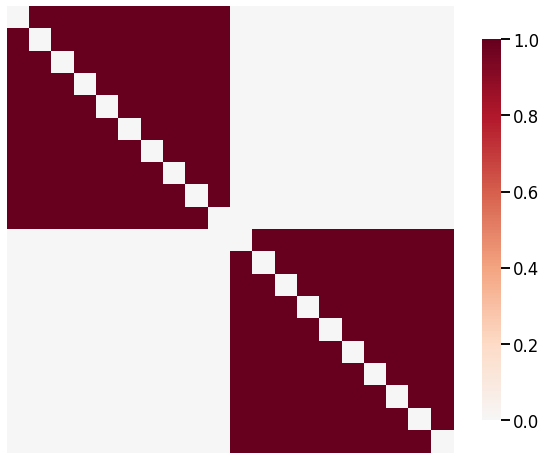

In [4]:
n = [10, 10]
p = np.eye(2)
wt = [[normal, poisson],
      [poisson, normal]]
wtargs = [[dict(loc=3, scale=1), dict(lam=5)],
          [dict(lam=5), dict(loc=3, scale=1)]]

# B = sbm(n=n, p=p, 
#         wt=wt, wtargs=wtargs)
Guw = sbm(n=n, p=p)
Gw = sbm(n=n, p=p, wt=wt, wtargs=wtargs)
Guwd = sbm(n=n, p=p, directed=True)
Gwd = sbm(n=n, p=p, wt=wt, wtargs=wtargs, directed=True)

heatmap(Guw)

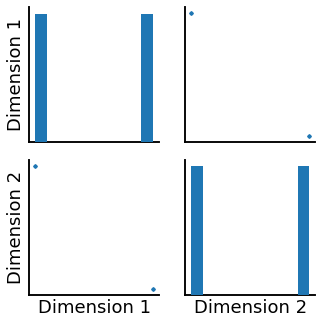

In [5]:
# plot
ase = ASE(n_components=2)
Xhat = ase.fit_transform(Guw)

pairplot(Xhat)

In [6]:
np.round(Xhat)

array([[ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 1., -0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

<AxesSubplot:>

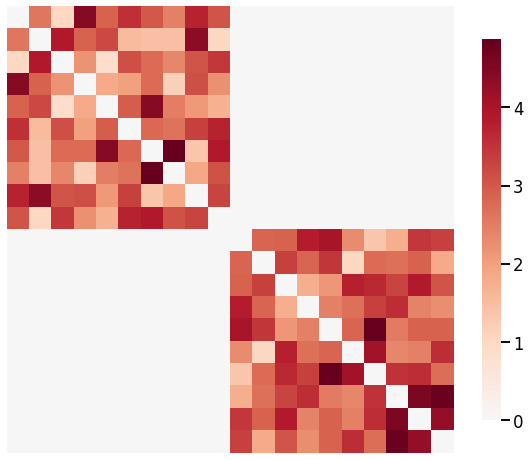

In [7]:
heatmap(Gw)

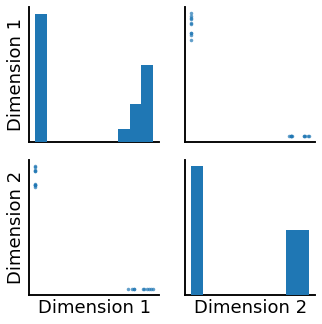

In [8]:
ase = ASE(n_components=2)
Xhat = ase.fit_transform(Gw)

pairplot(Xhat)

In [9]:
np.round(Xhat)

array([[ 0.,  2.],
       [-0.,  1.],
       [-0.,  1.],
       [ 0.,  2.],
       [ 0.,  1.],
       [-0.,  2.],
       [ 0.,  2.],
       [-0.,  1.],
       [-0.,  2.],
       [-0.,  2.],
       [ 2., -0.],
       [ 1., -0.],
       [ 2.,  0.],
       [ 2., -0.],
       [ 2., -0.],
       [ 2.,  0.],
       [ 2.,  0.],
       [ 2.,  0.],
       [ 2.,  0.],
       [ 2.,  0.]])

In [10]:
Gw.shape

(20, 20)

In [11]:
remove_vertices(Gw, 1, return_vertices=True)

(array([[0.        , 1.01683414, 4.44731536, 2.87462681, 3.54897054,
         3.0120366 , 2.4680422 , 3.76681302, 3.06466778, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [1.01683414, 0.        , 2.19903643, 0.89104761, 3.12896009,
         2.77388083, 2.39068144, 3.08234434, 3.46053277, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [4.44731536, 2.19903643, 0.        , 1.85807944, 1.98905925,
         2.75894442, 1.15469635, 3.14110177, 2.23977077, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [2.87462681, 0.89104761, 1.85807944, 0.        , 2.94129447,
         4.44629157, 2.48022354, 2.11219134, 1.71309016, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        

## Tests for remove_vertices

In [115]:
np.__version__

'1.19.1'

In [125]:
# testing remove_vertices
from graspologic.utils import is_almost_symmetric, import_graph, symmetrize

def remove_vertices(graph, indices, return_vertices=False):
    # type checks
    directed = not is_almost_symmetric(graph)
    graph = import_graph(graph)

    # truncate graph
    A = np.delete(np.delete(graph, indices, 0), indices, 1)

    # grab relevant vertices
    if return_vertices:
        rows = np.delete(graph, indices, axis=0)
        vertices = rows[:, indices].T
        if directed:
            cols = np.delete(graph, indices, axis=1)
            vertices_right = cols[indices, :]
            return A, (vertices, vertices_right)
        return A, vertices
    return A

# generate data (undirected)
G = np.arange(1, 26).reshape(5, 5)
G = symmetrize(G, method='tril')
G[np.diag_indices(len(G))] = 0

# tests (undirected)
vertices = [0, -1, 1]
A, a = remove_vertices(G, indices=vertices, return_vertices=True)
assert np.array_equal(A, np.array([[0, 18], [18, 0]]))
assert np.array_equal(a, np.array([[11, 16],
                                   [23, 24],
                                   [12, 17]]))

# with integer index
A, a = remove_vertices(G, indices=0, return_vertices=True)
assert np.array_equal(A, G[1:, 1:])
assert np.array_equal(a, np.array([6, 11, 16, 21]))

assert np.array_equal(remove_vertices(G, 0), remove_vertices(G, [0]))

# directed case
G = np.arange(1, 26).reshape(5, 5)
G[np.diag_indices(len(G))] = 0
A, a = remove_vertices(G, indices=vertices, return_vertices=True)
assert np.array_equal(A, np.array([[0, 14], [18, 0]]))
assert np.array_equal(a[0], np.array([[11, 16],
                                      [15, 20],
                                      [12, 17]]))
assert np.array_equal(a[1], np.array([[3, 4],
                                      [23, 24],
                                      [8, 9]]))

In [123]:
a

(array([[11., 16.],
        [15., 20.],
        [12., 17.]]),
 array([[ 3.,  4.],
        [23., 24.],
        [ 8.,  9.]]))

In [118]:
G

array([[ 0,  2,  3,  4,  5],
       [ 6,  0,  8,  9, 10],
       [11, 12,  0, 14, 15],
       [16, 17, 18,  0, 20],
       [21, 22, 23, 24,  0]])